<a href="https://colab.research.google.com/github/Mariyaben/Image_Processing_Lab/blob/main/Image_Processing_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


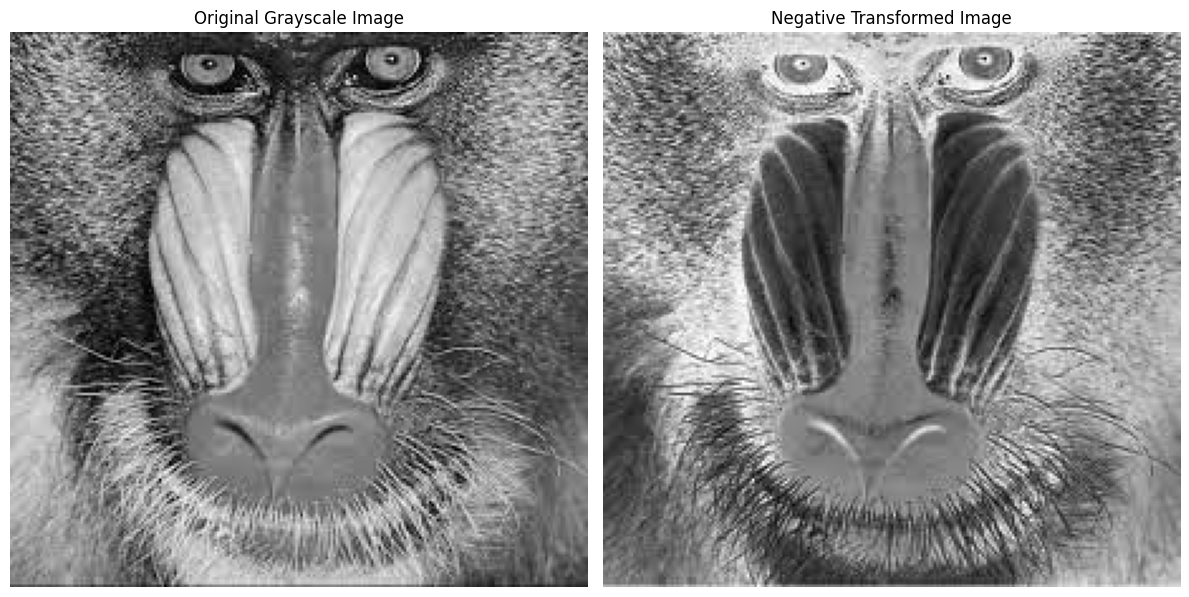

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to generate the negative of an image
def apply_negative_transform(img):
    inverted_img = 255 - img
    return inverted_img

# Load the image in grayscale mode
input_image = cv2.imread("/content/drive/MyDrive/testimage.jpeg", cv2.IMREAD_GRAYSCALE)

# Perform the negative transformation
neg_image = apply_negative_transform(input_image)

# Plotting the original and negative images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(input_image, cmap='gray')
plt.axis('off')  # Hide axes for a cleaner display

plt.subplot(1, 2, 2)
plt.title('Negative Transformed Image')
plt.imshow(neg_image, cmap='gray')
plt.axis('off')

plt.tight_layout()  # Adjust the spacing between plots
plt.show()


In [7]:
input_image = cv2.imread('/content/drive/MyDrive/testimage2.jpeg', cv2.IMREAD_GRAYSCALE)
print(input_image)  # Check if the image is loaded properly


[[113 114 114 ... 165 165 165]
 [114 114 114 ... 165 165 165]
 [114 114 114 ... 166 166 166]
 ...
 [ 65  65  66 ... 190 190 190]
 [ 64  64  65 ... 202 202 202]
 [ 63  63  64 ... 212 212 212]]


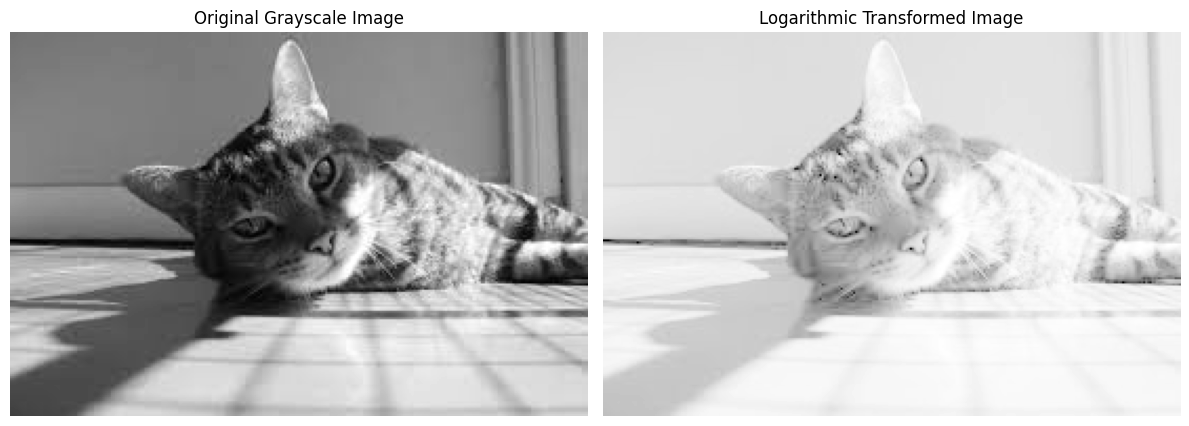

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply log transformation to an image
def apply_log_transform(img, scale_factor=1.0):
    # Convert image to float to avoid data loss
    float_img = np.float32(img)

    # Perform the logarithmic transformation
    transformed_img = scale_factor * np.log1p(float_img)  # log1p(x) computes log(1 + x)

    # Normalize the result to the 0-255 range, with error handling for divide by zero
    min_val, max_val = np.min(transformed_img), np.max(transformed_img)
    if max_val - min_val == 0:  # Avoid division by zero
        norm_log_img = np.zeros_like(transformed_img, dtype=np.uint8)
    else:
        norm_log_img = np.uint8(255 * (transformed_img - min_val) / (max_val - min_val))
    return norm_log_img

# Load the image in grayscale format
input_image = cv2.imread('/content/drive/MyDrive/testimage2.jpeg', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if input_image is None:
    print("Error: Image not found or unable to load the image.")
else:
    # Apply log transformation with a higher scaling factor
    log_transformed_image = apply_log_transform(input_image, scale_factor=10.0)

    # Visualize the original and transformed images side by side
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Original Grayscale Image')
    plt.imshow(input_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Logarithmic Transformed Image')
    plt.imshow(log_transformed_image, cmap='gray')
    plt.axis('off')

    plt.tight_layout()  # Adjusts layout to prevent overlapping
    plt.show()


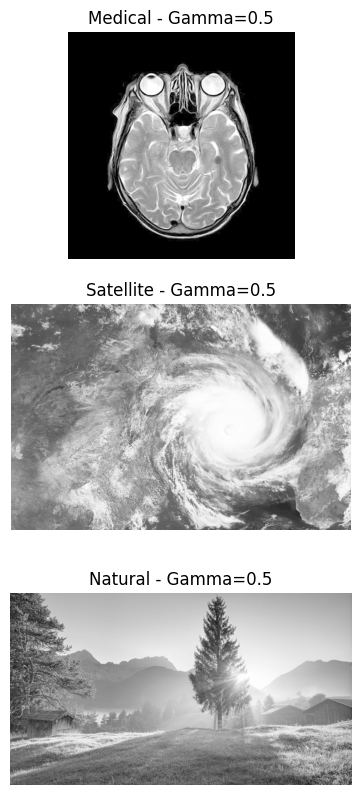

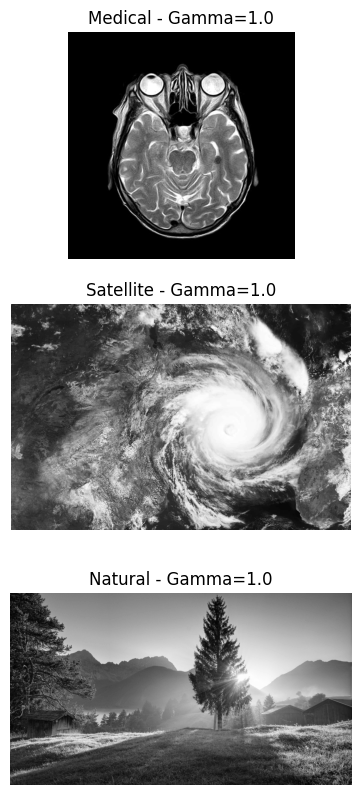

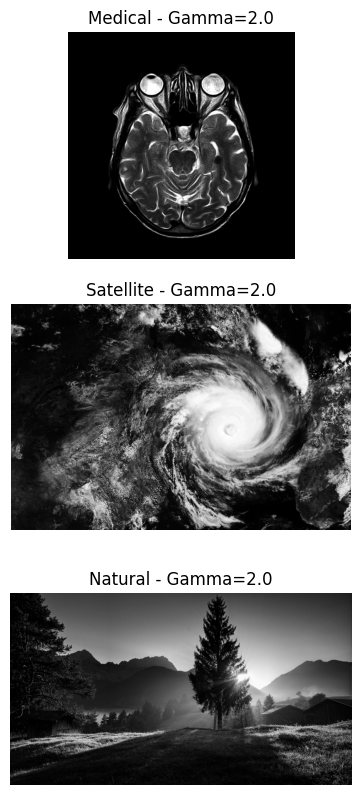

In [ ]:
def power_law_transformation(image, gamma=1.0, c=1.0):
    # Convert image to float32
    image_float = np.float32(image) / 255.0
    # Apply power-law transformation
    power_law_image = c * np.power(image_float, gamma)
    # Normalize to 0-255
    power_law_image = np.uint8(255 * power_law_image)
    return power_law_image

# Load different types of images
images = {
    'Medical': cv2.imread('/content/drive/MyDrive/data images/3.jpg', cv2.IMREAD_GRAYSCALE), # 'medical_image.jpg'
    'Satellite': cv2.imread('/content/drive/MyDrive/data images/4.jpg', cv2.IMREAD_GRAYSCALE), # 'satellite_image.jpg'
    'Natural': cv2.imread('/content/drive/MyDrive/data images/5.jpg', cv2.IMREAD_GRAYSCALE) # 'natural_image.jpg'
}

gammas = [0.5, 1.0, 2.0]

for gamma in gammas:
    plt.figure(figsize=(15, 10))
    for i, (title, image) in enumerate(images.items()):
        transformed_image = power_law_transformation(image, gamma)
        plt.subplot(len(images), len(gammas), i*len(gammas) + gammas.index(gamma) + 1)
        plt.title(f'{title} - Gamma={gamma}')
        plt.imshow(transformed_image, cmap='gray')
        plt.axis('off')

    plt.show()
